<b>2. Logistic Regression (binary classification)</b>

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Step 1: Data Generation

In [13]:
import numpy as np

def generate_data(n=200):
    np.random.seed(42)

    x = np.random.uniform(-10, 10, n)
    y = (x > 0).astype(int)   # class boundary at x = 0

    x = x + np.random.normal(0, 1.5, size=n)

    return x, y

Step 2: Define Model

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(x, w, b):
    return sigmoid(w * x + b)

Step 3: Loss calculation (mse loss not used, use cross entropy loss)


In [15]:
def bce_loss(y, y_pred):
    epsilon = 1e-9   # to avoid log(0)
    return -(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon)).mean()

Step 4: Train

In [16]:
def train(x,y, lr=0.1, epochs=2000):

    w,b = 0.0,0.0
    losses = []
    
    for i in range(epochs):

        y_pred = predict(x,w,b)

        loss = bce_loss(y,y_pred)
        losses.append(loss)

        dw = ((y_pred - y) * x).mean()
        db = ((y_pred - y)).mean()

        w -= lr * dw
        b -= lr * db

    return w,b,losses


Step 5: Visualisation

In [17]:

def plot_decision(x, y, w, b):
    plt.scatter(x[y==0], y[y==0], label="Class 0")
    plt.scatter(x[y==1], y[y==1], label="Class 1")
    #plt.scatter(x,y,label="Data")

    xs = np.linspace(x.min(), x.max(), 100)
    probs = predict(xs, w, b)

    #print(probs)

    plt.plot(xs, probs, color='black', label="P(class=1)")
    plt.axhline(0.5, color='red', linestyle='--', label="Decision threshold")

    plt.legend()
    plt.show()

def plot_loss(losses):
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Binary Cross Entropy")
    plt.title("Loss vs Epoch")
    plt.grid(True)
    plt.show()


Step 6: Main Code

[0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1]


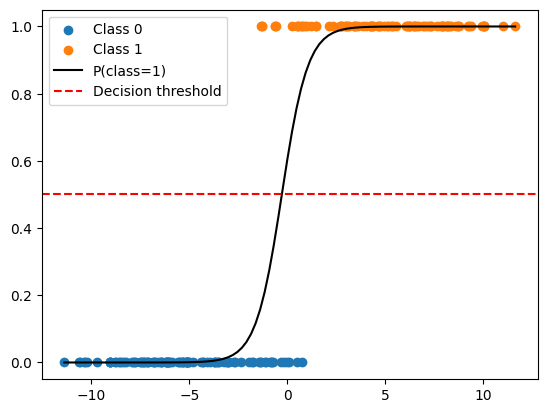

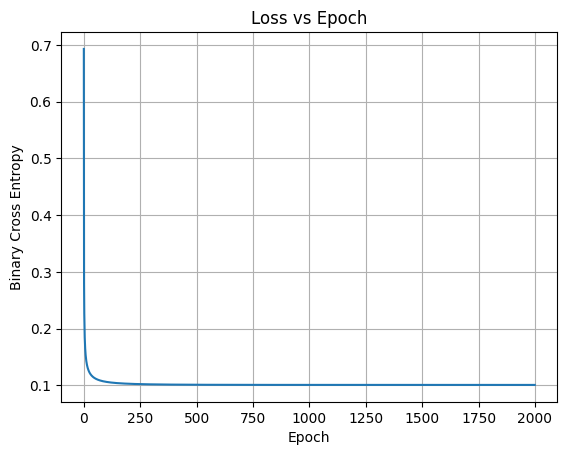

In [18]:
x,y = generate_data(200)

print(y)

w,b,losses = train(x,y,lr=0.1,epochs=2000)

plot_decision(x,y,w,b)
plot_loss(losses)